##1 - Importação das Libs e verificações iniciais

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

In [ ]:
datas = load_wine()

df_wine = pd.DataFrame(np.c_[datas['data'], datas['target']],
                       columns=np.append(datas['feature_names'], ['target']))

In [ ]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [ ]:
df_wine.shape

(178, 14)

In [ ]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


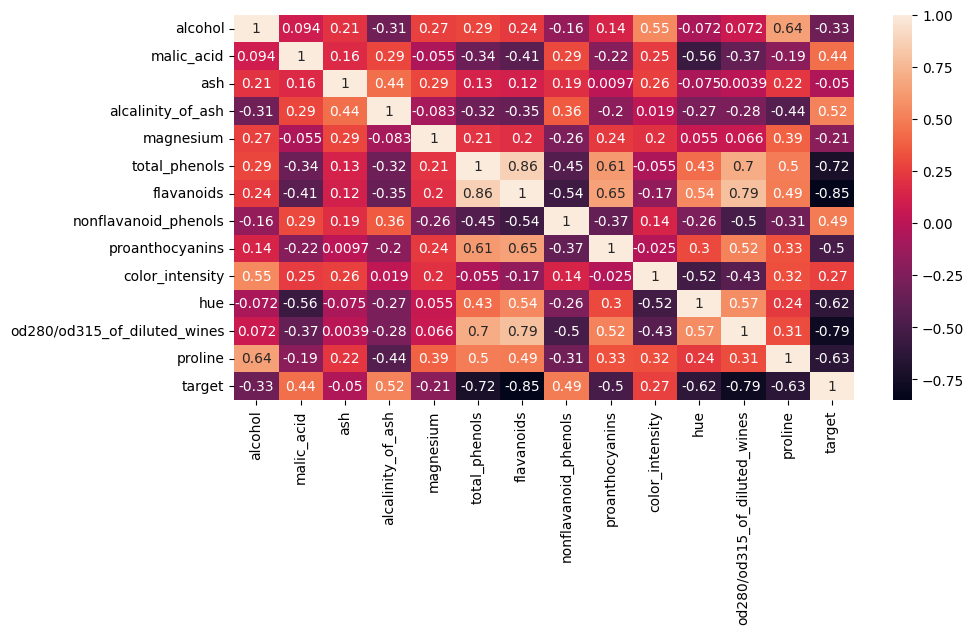

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df_wine.corr(), annot=True)
plt.show()

##2 - Separação treino/teste

In [ ]:
X = df_wine[df_wine.columns[0:-1]]
y = df_wine['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##3 - Predições

In [ ]:
# KNN
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

# DecisionTreeClassifier
model_decision_tree = DecisionTreeClassifier(max_depth=2, random_state=42)
model_decision_tree.fit(X_train, y_train)
y_pred_tree = model_decision_tree.predict(X_test)

# RandomForestClassifier
model_random_forest = RandomForestClassifier(max_depth=2, random_state=42)
model_random_forest.fit(X_train, y_train)
y_pred_random_forest = model_random_forest.predict(X_test)

##4 - Métricas de desempenho

Para o modelo 'KNN':
Obteve-se uma acurácia de: 0.74
Seu relatório de classificação foi o seguinte:
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        19
         1.0       0.75      0.71      0.73        21
         2.0       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54

Matriz de consusão gerada:


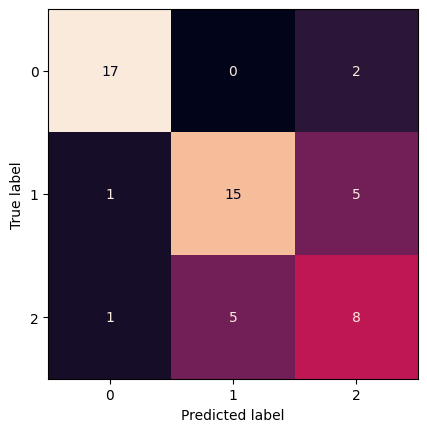




Para o modelo 'DecisionTreeClassifier':
Obteve-se uma acurácia de: 0.87
Seu relatório de classificação foi o seguinte:
              precision    recall  f1-score   support

         0.0       0.75      0.95      0.84        19
         1.0       0.94      0.76      0.84        21
         2.0       1.00      0.93      0.96        14

    accuracy                           0.87        54
   macro avg       0.90      0.88      0.88        54
weighted avg       0.89      0.87      0.87        54

Matriz de consusão gerada:


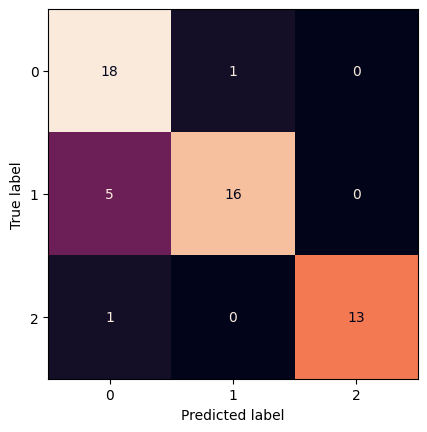




Para o modelo 'RandomForestClassifier':
Obteve-se uma acurácia de: 0.96
Seu relatório de classificação foi o seguinte:
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        19
         1.0       1.00      0.90      0.95        21
         2.0       1.00      1.00      1.00        14

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.97      0.96      0.96        54

Matriz de consusão gerada:


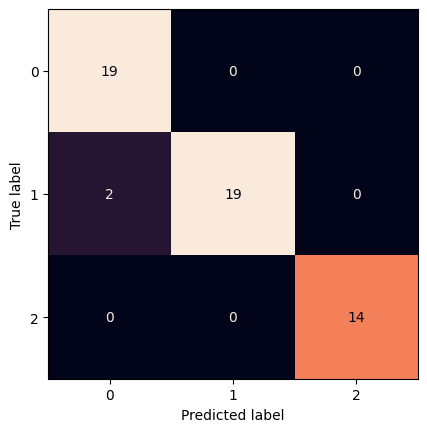

In [ ]:
y_pred_models = {"KNN":y_pred_knn, "DecisionTreeClassifier":y_pred_tree, "RandomForestClassifier":y_pred_random_forest}

for k in y_pred_models.keys():
  accuracy = accuracy_score(y_test, y_pred_models[k])
  clss_report = classification_report(y_test, y_pred_models[k])

  print(f"Para o modelo '{k}':")
  print(f"Obteve-se uma acurácia de: {accuracy:.2f}")
  print(f"Seu relatório de classificação foi o seguinte:\n{clss_report}")
  print("Matriz de consusão gerada:")
  ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                          y_pred=y_pred_models[k],
                                          display_labels=[0, 1, 2],
                                          colorbar=False,
                                          xticks_rotation="horizontal",
                                          cmap="rocket")
  plt.show()
  print("\n\n")